In [ ]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def extract_grid(file):
    """Extract latitude and longitude arrays from WRF geo_em file."""
    file = os.path.expanduser(file)
    ds = xr.open_dataset(file)
    lat = ds['XLAT_C'].values[0]
    lon = ds['XLONG_C'].values[0]
    ds.close()
    return lat, lon

# File paths
domain_id = 'Bangkok'
geo_em_d1 = f'../../samples/{domain_id}/geo_em.d01.nc'
geo_em_d2 = f'../../samples/{domain_id}/geo_em.d02.nc'
geo_em_d3 = f'../../samples/{domain_id}/geo_em.d03.nc'

lat1, lon1 = extract_grid(geo_em_d1)  # Parent
lat2, lon2 = extract_grid(geo_em_d2)  # Child
lat3, lon3 = extract_grid(geo_em_d3)  # Nested

def plot_domain_boundary(ax, lon, lat, color="blue", linestyle="-", linewidth=1.0, label=None):
    """Plot the boundary of a given domain."""

    # Top and bottom boundaries
    ax.plot(lon[0, :],    lat[0, :],    color=color, linestyle=linestyle, linewidth=linewidth,
            transform=ccrs.PlateCarree(), label=label)
    ax.plot(lon[-1, :],   lat[-1, :],   color=color, linestyle=linestyle, linewidth=linewidth,
            transform=ccrs.PlateCarree())
    # Left and right boundaries
    ax.plot(lon[:, 0],    lat[:, 0],    color=color, linestyle=linestyle, linewidth=linewidth,
            transform=ccrs.PlateCarree())
    ax.plot(lon[:, -1],   lat[:, -1],   color=color, linestyle=linestyle, linewidth=linewidth,
            transform=ccrs.PlateCarree())

# Map visualization
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("WRF Domain Boundaries", fontsize=16)

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.OCEAN)

# Domain boundaries + labels
plot_domain_boundary(ax, lon1, lat1, color="blue",  linestyle="--", linewidth=1.2, label="d01 (Parent)")
plot_domain_boundary(ax, lon2, lat2, color="red",   linestyle="-",  linewidth=1.2, label="d02 (Child)")
plot_domain_boundary(ax, lon3, lat3, color="green", linestyle="-",  linewidth=1.2, label="d03 (Nested)")

# Legend
ax.legend(loc="upper right", fontsize=12, frameon=True)

plt.tight_layout()
plt.show()


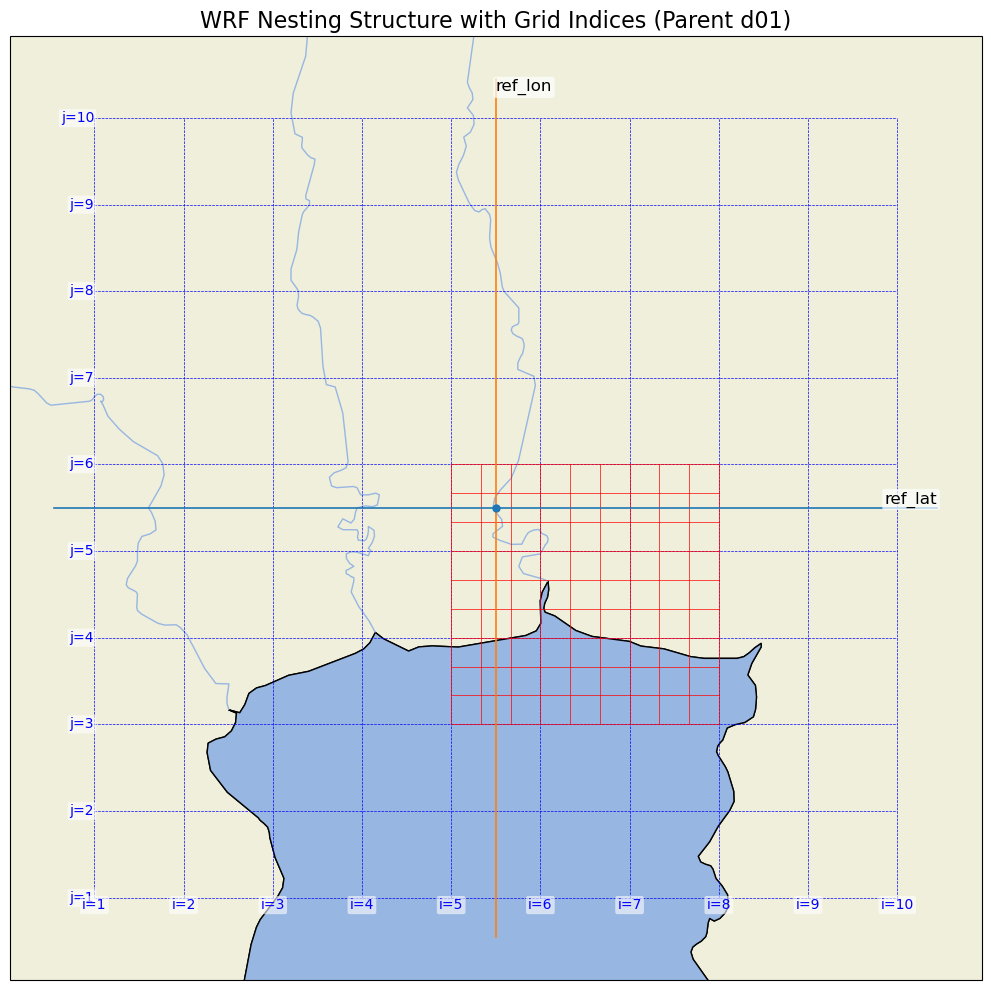

In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def extract_grid_lines(file):
    """Extract latitude/longitude 2D arrays from a geo_em file."""
    file = os.path.expanduser(file)
    ds = xr.open_dataset(file)
    lat = ds['XLAT_C'].values[0]
    lon = ds['XLONG_C'].values[0]
    ds.close()
    return lat, lon

# === Input files ===
domain_id = 'Example'
geo_em_d1 = f'../../samples/{domain_id}/geo_em.d01.nc'
geo_em_d2 = f'../../samples/{domain_id}/geo_em.d02.nc'
# geo_em_d3 = f'../../samples/{domain_id}/geo_em.d03.nc'

lat1, lon1 = extract_grid_lines(geo_em_d1)  # Parent domain
lat2, lon2 = extract_grid_lines(geo_em_d2)  # Child domain

# === Reference latitude/longitude (CEN_LAT / CEN_LON) ===
cen_lat = xr.open_dataset(geo_em_d1).attrs["CEN_LAT"]
cen_lon = xr.open_dataset(geo_em_d1).attrs["CEN_LON"]

# Parameters
label_step = 1     # Label every Nth grid line
label_size = 10    # Font size of labels

# === Map visualization ===
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("WRF Nesting Structure with Grid Indices (Parent d01)", fontsize=16)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# --- Parent domain grid (dashed lines) ---
nj, ni = lat1.shape  # j: latitude index (rows), i: longitude index (columns)
for j in range(nj):
    ax.plot(lon1[j, :], lat1[j, :], linestyle='--', color='blue', linewidth=0.5, transform=ccrs.PlateCarree())
for i in range(ni):
    ax.plot(lon1[:, i], lat1[:, i], linestyle='--', color='blue', linewidth=0.5, transform=ccrs.PlateCarree())

# --- Add grid index labels for parent domain ---
locator = mticker.MaxNLocator(nbins=10, integer=True)
j_ticks = locator.tick_values(0, nj-1).astype(int)
i_ticks = locator.tick_values(0, ni-1).astype(int)

# j (latitude index): show on the western edge
for j in j_ticks:
    if j < nj:
        i_west = 0
        xj = lon1[j, i_west]
        yj = lat1[j, i_west]
        ax.text(
            xj, yj, f"j={j+1}",
            fontsize=label_size, color='blue',
            ha='right', va='center',
            transform=ccrs.PlateCarree(),
            zorder=5,
            bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.6)
        )

# i (longitude index): show on the southern edge
for i in i_ticks:
    if i < ni:
        j_south = 0
        xi = lon1[j_south, i]
        yi = lat1[j_south, i]
        ax.text(
            xi, yi, f"i={i+1}",
            fontsize=label_size, color='blue',
            ha='center', va='top',
            transform=ccrs.PlateCarree(),
            zorder=5,
            bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.6)
        )

# --- Child domain grid (solid lines) ---
for j in range(lat2.shape[0]):
    ax.plot(lon2[j, :], lat2[j, :], linestyle='-', color='red', linewidth=0.5, transform=ccrs.PlateCarree())
for i in range(lat2.shape[1]):
    ax.plot(lon2[:, i], lat2[:, i], linestyle='-', color='red', linewidth=0.5, transform=ccrs.PlateCarree())

# === Draw reference latitude and longitude lines ===
xmin, xmax, ymin, ymax = ax.get_extent(crs=ccrs.PlateCarree())

# Reference latitude line
ax.plot([xmin, xmax], [cen_lat, cen_lat],
        linestyle='-', linewidth=1.2, transform=ccrs.PlateCarree(),
        zorder=6)

# Reference longitude line
ax.plot([cen_lon, cen_lon], [ymin, ymax],
        linestyle='-', linewidth=1.2, transform=ccrs.PlateCarree(),
        zorder=6)

# Intersection marker
ax.scatter([cen_lon], [cen_lat], transform=ccrs.PlateCarree(),
           s=25, zorder=7)

# Labels for reference latitude/longitude
ax.text(xmax, cen_lat, "ref_lat",
        ha='right', va='bottom', fontsize=12,
        transform=ccrs.PlateCarree(),
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.7),
        zorder=7)

ax.text(cen_lon, ymax, "ref_lon",
        ha='left', va='top', fontsize=12,
        transform=ccrs.PlateCarree(),
        bbox=dict(boxstyle="round,pad=0.15", fc="white", ec="none", alpha=0.7),
        zorder=7)

plt.tight_layout()
plt.show()



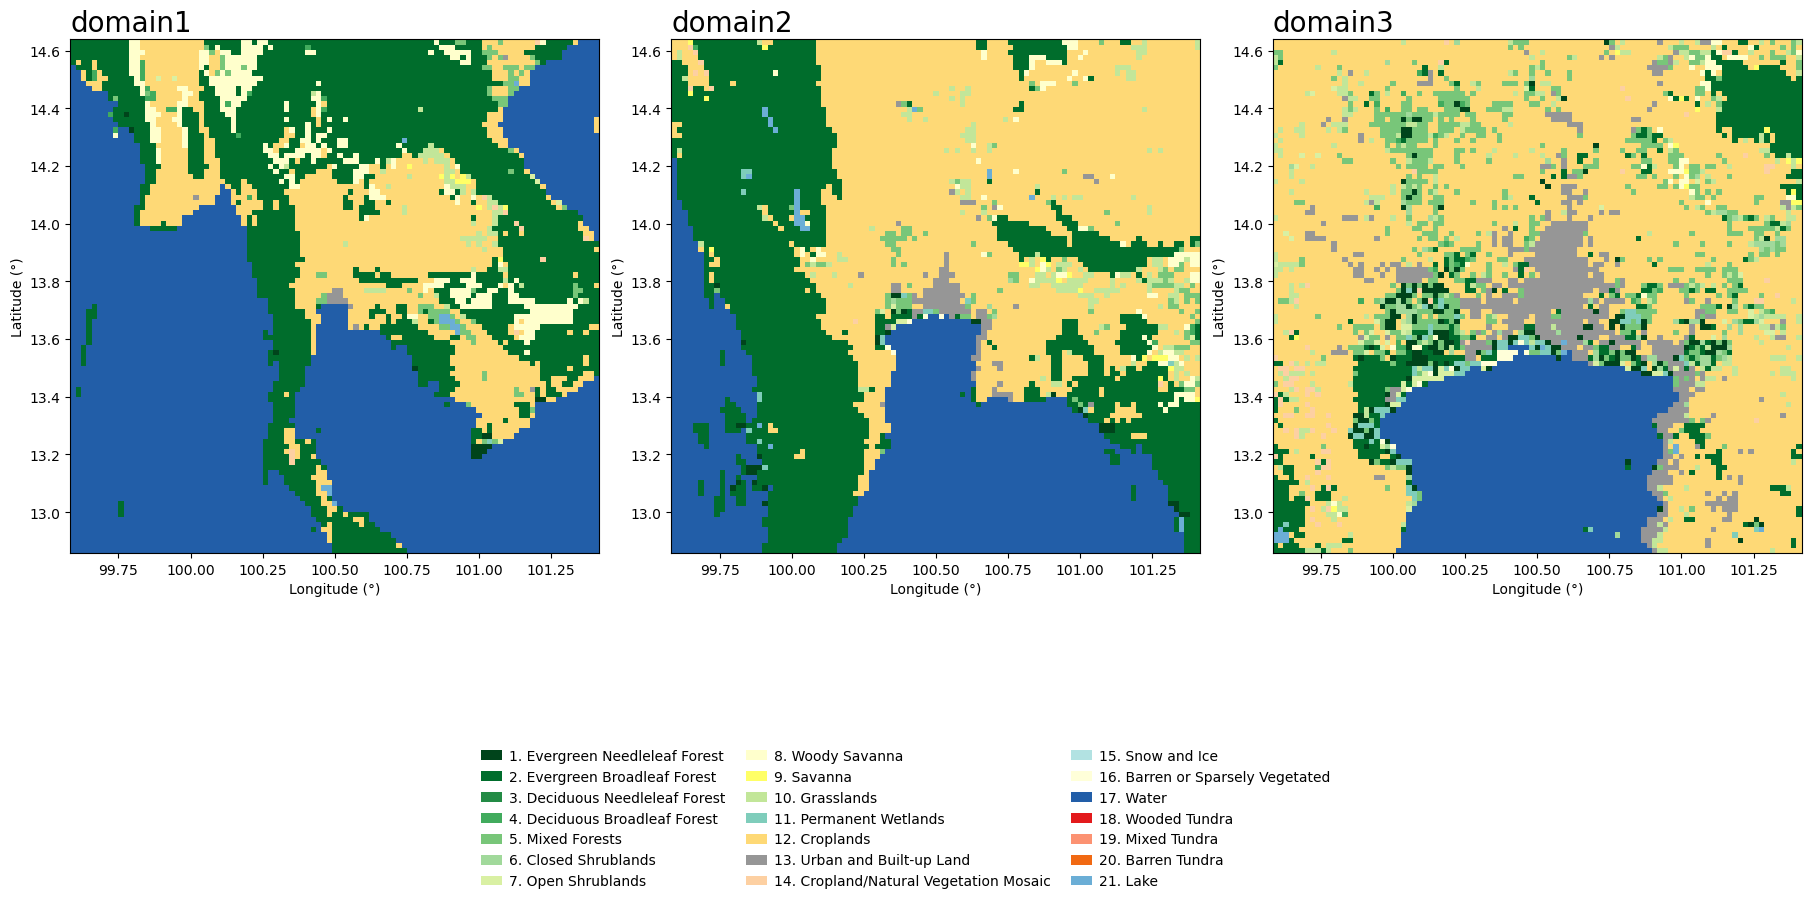

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import xarray as xr
import numpy as np
import os


# --- File list (1–3 files supported) ---
domain_id = 'Bangkok'
files = [
    (f'../../samples/{domain_id}/geo_em.d01.nc', "domain1"),
    (f'../../samples/{domain_id}/geo_em.d02.nc', "domain2"),
    (f'../../samples/{domain_id}/geo_em.d03.nc', "domain3"),
]

# --- Labels and Colors ---
labels = [
    "1. Evergreen Needleleaf Forest", "2. Evergreen Broadleaf Forest", "3. Deciduous Needleleaf Forest",
    "4. Deciduous Broadleaf Forest", "5. Mixed Forests", "6. Closed Shrublands",
    "7. Open Shrublands", "8. Woody Savanna", "9. Savanna", "10. Grasslands",
    "11. Permanent Wetlands", "12. Croplands", "13. Urban and Built-up Land",
    "14. Cropland/Natural Vegetation Mosaic", "15. Snow and Ice", "16. Barren or Sparsely Vegetated",
    "17. Water", "18. Wooded Tundra", "19. Mixed Tundra", "20. Barren Tundra",
    "21. Lake"
]

colors = [
    "#00441b", "#006d2c", "#238b45", "#41ab5d", "#78c679",
    "#a1d99b", "#d9f0a3", "#ffffcc", "#ffff66", "#c2e699",
    "#7fcdbb", "#fed976", "#969696", "#fdd0a2", "#b2e2e2",
    "#ffffd9", "#225ea8", "#e31a1c", "#fc9272", "#f16913",
    "#6baed6"
]

# --- Adjust LU_INDEX values ---
def adjust_values(lu_index):
    # Convert 51–60 (urban categories) to 13
    lu_index[(lu_index >= 51) & (lu_index <= 60)] = 13
    valid_indices = list(range(1, 22))
    index_map = {val: idx for idx, val in enumerate(valid_indices)}
    lu_index_mapped = np.vectorize(index_map.get)(lu_index)
    return lu_index_mapped

# --- Colormap ---
cmap = ListedColormap(colors)
bounds = np.arange(len(colors) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# --- Load datasets ---
datasets = []
lu_indices = []
titles = []
for fname, title in files:
    if os.path.exists(fname):
        ds = xr.open_dataset(fname)
        lu_index = ds["LU_INDEX"].isel(Time=0).values
        lat = ds["XLAT_M"].isel(Time=0).values
        lon = ds["XLONG_M"].isel(Time=0).values
        datasets.append(ds)
        lu_indices.append(lu_index)
        titles.append(title)

nfiles = len(lu_indices)

# --- Figure ---
fig, axes = plt.subplots(1, nfiles, figsize=(6 * nfiles, 8), constrained_layout=True)

if nfiles == 1:
    axes = [axes]

for ax, lu_index, title in zip(axes, lu_indices, titles):
    lu_index = adjust_values(lu_index)
    pcm = ax.pcolormesh(lon, lat, lu_index, cmap=cmap, norm=norm, shading="auto")
    ax.set_title(title, fontsize=20, loc="left")
    ax.set_xlabel("Longitude (°)")
    ax.set_ylabel("Latitude (°)")
    # Preserve aspect ratio
    ax.set_aspect("equal", adjustable="box")

# --- Legend (shared) ---
patches = [Patch(facecolor=color, edgecolor="none", label=label) for label, color in zip(labels, colors)]
fig.legend(
    handles=patches,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    fontsize=10,
    frameon=False,
    handlelength=1.5,
    handletextpad=0.5,
    columnspacing=1.5,
)

plt.show()



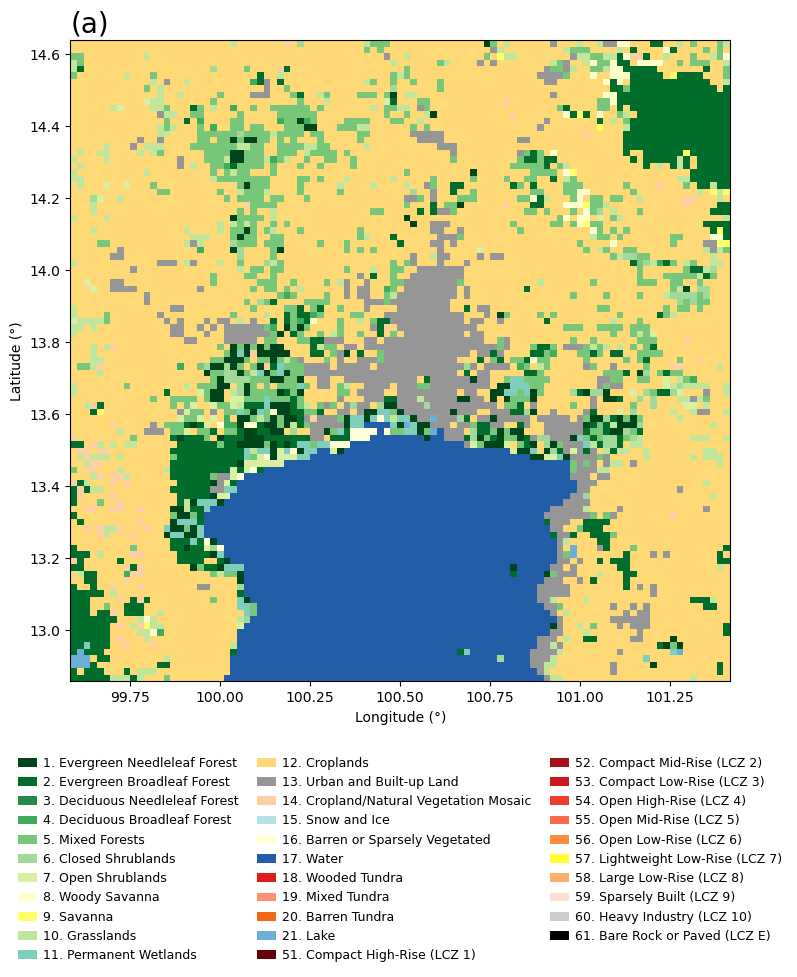

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import xarray as xr
import numpy as np

# --- Labels and Colors ---
labels = [
    "1. Evergreen Needleleaf Forest", "2. Evergreen Broadleaf Forest", "3. Deciduous Needleleaf Forest",
    "4. Deciduous Broadleaf Forest", "5. Mixed Forests", "6. Closed Shrublands",
    "7. Open Shrublands", "8. Woody Savanna", "9. Savanna", "10. Grasslands",
    "11. Permanent Wetlands", "12. Croplands", "13. Urban and Built-up Land",
    "14. Cropland/Natural Vegetation Mosaic", "15. Snow and Ice", "16. Barren or Sparsely Vegetated",
    "17. Water", "18. Wooded Tundra", "19. Mixed Tundra", "20. Barren Tundra",
    "21. Lake", "51. Compact High-Rise (LCZ 1)", "52. Compact Mid-Rise (LCZ 2)",
    "53. Compact Low-Rise (LCZ 3)", "54. Open High-Rise (LCZ 4)", "55. Open Mid-Rise (LCZ 5)",
    "56. Open Low-Rise (LCZ 6)", "57. Lightweight Low-Rise (LCZ 7)", "58. Large Low-Rise (LCZ 8)",
    "59. Sparsely Built (LCZ 9)", "60. Heavy Industry (LCZ 10)", "61. Bare Rock or Paved (LCZ E)"
]

colors = [
    "#00441b", "#006d2c", "#238b45", "#41ab5d", "#78c679",
    "#a1d99b", "#d9f0a3", "#ffffcc", "#ffff66", "#c2e699",
    "#7fcdbb", "#fed976", "#969696", "#fdd0a2", "#b2e2e2",
    "#ffffd9", "#225ea8", "#e31a1c", "#fc9272", "#f16913",
    "#6baed6", "#67000d", "#a50f15", "#cb181d", "#ef3b2c",
    "#fb6a4a", "#fd8d3c", "#ffff33", "#fdae6b", "#fee0d2",
    "#cccccc", "#000000"
]

# --- File path ---
geo_em = f'../../samples/{domain_id}/geo_em.d03.nc'

# --- Open dataset with xarray ---
ds = xr.open_dataset(geo_em)

# Extract LU_INDEX, lat, lon
lu_index = ds["LU_INDEX"].isel(Time=0).values
lat = ds["XLAT_M"].isel(Time=0).values
lon = ds["XLONG_M"].isel(Time=0).values

# --- Map values: 1–21 and 51–61 into continuous indices ---
def adjust_values(lu_index):
    valid_indices = list(range(1, 22)) + list(range(51, 62))  # 1–21, 51–61
    index_map = {val: idx for idx, val in enumerate(valid_indices)}
    lu_index_mapped = np.vectorize(index_map.get)(lu_index)
    return lu_index_mapped

lu_index = adjust_values(lu_index)

# --- Colormap ---
cmap = ListedColormap(colors)
bounds = np.arange(len(colors) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

# --- Legend patches ---
patches = [Patch(facecolor=color, edgecolor="none", label=label)
           for label, color in zip(labels, colors)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 10))
pcm = ax.pcolormesh(lon, lat, lu_index, cmap=cmap, norm=norm, shading="auto")

ax.set_title("(a)", fontsize=20, loc="left")
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")
ax.set_aspect("equal", adjustable="box")  # Preserve aspect ratio

# --- Legend ---
ax.legend(
    handles=patches,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    fontsize=9,
    frameon=False,
    handlelength=1.5,
    handletextpad=0.5,
    columnspacing=1.5
)

plt.tight_layout()
plt.show()

ds.close()
